In [1]:
25*6/10

15.0

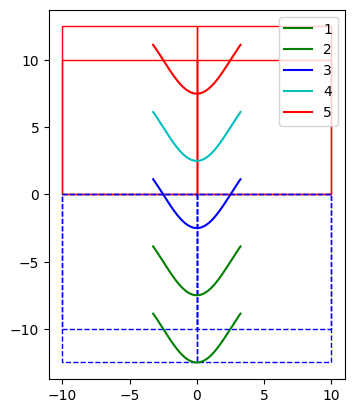

In [2]:
from matplotlib import pyplot as plt
import numpy as np


def rectangle(x, y, width, height, color,linestyle="-"):
    plt.fill([x, x, x + width, x + width], 
             [y, y + height, y + height, y], color="None", edgecolor=color, linestyle=linestyle)

lx = 10

rectangle(0,   0,  lx,  10  , 'red')
rectangle(0,   0, -lx,  10  , 'red')
rectangle(0,   0,  lx, 12.5 , 'red')
rectangle(0,   0, -lx, 12.5 , 'red')



rectangle(0,   0,  lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0, -lx,  -10  , 'blue',linestyle="--")
rectangle(0,   0,  lx, -12.5 , 'blue',linestyle="--")
rectangle(0,   0, -lx, -12.5 , 'blue',linestyle="--")
# aspect ratio

R = 10/4
T = 10

t1 = np.linspace(0, 1, 2000)

# =============================================================================
def fparams(t,y0):
    y = 0.65*lx*(t - 1/2) 
    x = -R*np.cos(2*np.pi*y/T) + y0
    return y,x

# x1,y1 = fparams(t1,-4*R)

# y1 = t1*2*R + R
# x1 = -R*np.cos(2*np.pi*y1/T) - 4*R

# plt.plot(x1,y1, 'r',label="1")

x1,y1 = fparams(t1,-4*R)
plt.plot(x1,y1, 'g',label="1")  

x2,y2 = fparams(t1,-2*R)
plt.plot(x2,y2, 'g',label="2")  

x3,y3 = fparams(t1,0)
plt.plot(x3,y3, 'b',label="3")

x4,y4 = fparams(t1,2*R)
plt.plot(x4,y4, 'c',label="4")


x5 = 0.65*lx*(t1 - 1/2) 
y5 = -R*np.cos(2*np.pi*x5/T) + 4*R
# x5,y5 = fparams(t1,4*R)
plt.plot(x5,y5, 'r',label="5")


# y5 = t1*R 
# x5 = -R*np.cos(2*np.pi*y5/T) + 4*R
# plt.plot(x5,y5, 'y' ,label="5")

# y6 = t1*2*R + 3*R
# x6 = -R*np.cos(2*np.pi*y6/T) + 4*R
# plt.plot(x6,y6, 'm' ,label="6")


# =============================================================================


plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

In [3]:
from gmshtools.CircRect6 import CircRect


In [4]:
import gmsh 

gmsh.initialize()

gmsh.model.add("t1")

# cilindro
Ly = 25
Lx = 60

tn  = 2.934
tl = 0.475
r  = 3*tl/8
d_Y  = 0.74297
d_SX = 0.5895
d_SY = 0.78042

A = np.pi*r**2


R = 10/6
nx_fibres = 6

lx = 10

z0 = tn/2
dx = 0.1 
dz = 0.1

hx = R
hz = tl
Lz = 2*(3*hz + z0) 

def CreateCylinder_Lxx(x0,z0):

    ellipse_1 = CircRect(x0, -Ly/2, z0, 
                         r, d_Y, 
                         [0,1,0] ,            # vec_z 
                         [1,0,0])             # vec_x
    
    ellipse_2 = CircRect(x0, +Ly/2, z0,
                         r, d_Y, 
                            [0,1,0] ,            # vec_z 
                            [1,0,0])             # vec_x
    gmsh.model.occ.synchronize()

    thrusection = gmsh.model.occ.addThruSections([ellipse_1, ellipse_2])

    gmsh.model.occ.synchronize()

    return thrusection[0][1]

def CreateCylinder_Lyy(y0,z0):
    
    ellipse_1 = CircRect(-0.325*lx, y0, z0,
                         r, d_Y, 
                            [1,0,0] ,            # vec_z 
                            [0,1,0])             # vec_x
    
    ellipse_2 = CircRect(0.325*lx, y0, z0,
                         r, d_Y, 
                            [1,0,0] ,            # vec_z 
                            [0,1,0])             # vec_x
    
    gmsh.model.occ.synchronize()



    thrusection = gmsh.model.occ.addThruSections([ellipse_1, ellipse_2])

    gmsh.model.occ.synchronize()

    return thrusection[0][1]

FM1_list = []


In [5]:

from gmshtools.CreateYarnRect import CreateYarnRect

trajs_mid = [ [x1,y1],
              [x2,y2],
              [x3,y3],
              [x4,y4],
              [x5,y5]]

for itraj_2D in trajs_mid:
    trajs = np.array([[itraj_2D[0][i],
                       itraj_2D[1][i], 
                    -z0 - 5*hz/2 ] 
                    for i in range(len(itraj_2D[0]))])

    yarn = CreateYarnRect({"trajs":trajs, 
                    "r":r, 
                    "d": d_SX,
                    "density":2.5,
                    "skip_left":2,
                    "skip_right":2,
                    "vec_init":[1,0,0],
                    "vec_end":[1,0,0]})

    FM1_list.append(yarn["volumes"][0][1])
    print("yarn", yarn["volumes"][0][1])
    # gmsh.fltk.run()

yarn 1                                                                                                                                
yarn 2                                                                                                                                
yarn 3                                                                                                                                
yarn 4                                                                                                                                
yarn 5                                                                                                                                


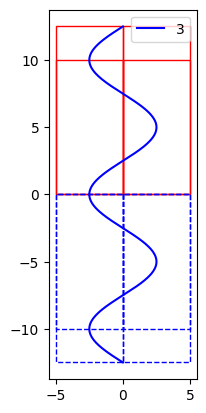

In [6]:
from matplotlib import pyplot as plt
import numpy as np


def rectangle(x, y, width, height, color,linestyle="-"):
    plt.fill([x, x, x + width, x + width], 
             [y, y + height, y + height, y], color="None", edgecolor=color, linestyle=linestyle)


rectangle(0,   0,  lx/2,  10  , 'red')
rectangle(0,   0, -lx/2,  10  , 'red')
rectangle(0,   0,  lx/2, 12.5 , 'red')
rectangle(0,   0, -lx/2, 12.5 , 'red')



rectangle(0,   0,  lx/2,  -10  , 'blue',linestyle="--")
rectangle(0,   0, -lx/2,  -10  , 'blue',linestyle="--")
rectangle(0,   0,  lx/2, -12.5 , 'blue',linestyle="--")
rectangle(0,   0, -lx/2, -12.5 , 'blue',linestyle="--")
# aspect ratio

R = 10/4
T = 10

t1 = np.linspace(0, 1, 500)

# =============================================================================
def fparams(t,y0):
    y = 2*12.5*t-12.5
    x = -R*np.cos(2*np.pi*y/T) + y0
    return x,y


# y1 = t1*2*R + R
# x1 = -R*np.cos(2*np.pi*y1/T) - 2*R

# plt.plot(x1,y1, 'r',label="1")


x3,y3 = fparams(t1,0)
plt.plot(x3,y3, 'b',label="3")


# y5 = 2*t1*R -R
# x5 = -R*np.cos(2*np.pi*y5/T) + 2*R
# plt.plot(x5,y5, 'y' ,label="5")

# y6 = t1*2*R + 3*R
# x6 = -R*np.cos(2*np.pi*y6/T) + 2*R
# plt.plot(x6,y6, 'm' ,label="6")

# y7 = t1*2*R - 3*R
# x7 = -R*np.cos(2*np.pi*y1/T) - 2*R
# plt.plot(x7,y7, 'k' ,label="7")

# =============================================================================


plt.gca().set_aspect('equal', adjustable='box')
plt.legend()

In [7]:

from gmshtools.CreateYarnRect import CreateYarnRect

trajs_mid = [ [x3,y3]]

for itraj_2D in trajs_mid:
    trajs = np.array([[itraj_2D[0][i],
                       itraj_2D[1][i], 
                    -z0 - 3*hz/2 ] 
                    for i in range(len(itraj_2D[0]))])

    yarn = CreateYarnRect({"trajs":trajs, 
                    "r":r, 
                    "d": d_SY,
                    "density":2.5,
                    "skip_left":3,
                    "skip_right":4,
                    "vec_init":[0,1,0],
                    "vec_end":[0,1,0]})

    FM1_list.append(yarn["volumes"][0][1])
    print("yarn", yarn["volumes"][0][1])


yarn 6  : [ 90%] Union                                                                                                                


In [8]:
yarn["volumes"]

[(3, 6)]

In [9]:

# box_cut = gmsh.model.occ.addBox( -Lx/2 ,  -Ly/2, -Lz/2, 
#                                    Lx   ,   Ly   , Lz)
# gmsh.model.occ.synchronize()

# yarn_cut = gmsh.model.occ.intersect(yarn["volumes"], [(3,box_cut)])
# gmsh.model.occ.synchronize()

# # gmsh.fltk.run()

# FM1_list.append(yarn_cut[0][0][1])

In [10]:
# yarn_cut[0][0][1]

In [11]:
yarn_cut = FM1_list[0]

box_cut = gmsh.model.occ.addBox( -Lx/2    ,  -Ly/2 , -Lz/2, 
                                 Lx ,  Ly   , Lz)
gmsh.model.occ.synchronize()

yarn_cut = gmsh.model.occ.intersect([(3,yarn_cut)], [(3,box_cut)])
gmsh.model.occ.synchronize()

FM1_list.append(yarn_cut[0][0][1])

# FM1_list = FM1_list[1:]

Info    : Cannot bind existing OpenCASCADE volume 1 to second tag 7                                                                    
Info    : Could not preserve tag of 3D object 7 (->1)


In [12]:

gmsh.model.occ.synchronize()
# 
#

nfilaments = int(0.5*25*6/10)

yspan = np.arange(-Ly/2, Ly/2, hx)
yspan = yspan + hx/2

FM2_list = []
for iy in yspan:
    FibreMinus_02 = CreateCylinder_Lyy(iy, -z0 - hz/2 )

    FM2_list.append(FibreMinus_02)

FM2_list.extend(FM1_list)


In [13]:
# for ix in range(-nx_fibres,nx_fibres):
#     FibreMinus_01 = CreateCylinder_Lxx(hx/2 + hx*ix, -z0 - 3*hz/2 )
#     FM1_list.append(FibreMinus_01)

In [14]:

# Identificamos las fibras
fibres_tags = np.concatenate([FM1_list, FM2_list])
f1 = gmsh.model.addPhysicalGroup(3, fibres_tags)
gmsh.model.setPhysicalName(3, f1, "Fibres")


gmsh.model.occ.synchronize()
box_01 = gmsh.model.occ.addBox( -Lx/2  , -Ly/2 , + z0 ,
                                Lx   ,  Ly   ,  3*hz    )

box_02 = gmsh.model.occ.addBox( -0.325*lx   , -Ly/2 , - z0 ,
                                2*0.325*lx   ,  Ly   ,  -3*hz    )

gmsh.model.occ.synchronize()


box_02_cut = gmsh.model.occ.cut([(3, box_02)], 
                   [(3,i) for i in FM2_list],
                   removeTool=False)

gmsh.model.occ.synchronize()

In [15]:
# # box 
# #
# gmsh.model.occ.synchronize()
# #

box_big_mid = gmsh.model.occ.addBox( -Lx/2   , -Ly/2     , -z0,
                                      Lx   ,  Ly       ,  2*z0    )


box_sup = gmsh.model.occ.addBox( -Lx/2  ,   -Ly/2 , z0 + hz,
                                  Lx    ,    Ly   ,  hz       )

# =============================================================================

# partition with rectangle 

# (0, Ly/2,  z0 + 2*hz)
# (0, Ly/2, -z0 - 2*hz)
# (0, -Ly/2, -z0 - 2*hz)
# (0, -Ly/2,  z0 + 2*hz)

p1_rect = gmsh.model.occ.addPoint(0, Ly/2,  z0 + 6*hz)
p2_rect = gmsh.model.occ.addPoint(0, Ly/2,  z0 +   hz)
p3_rect = gmsh.model.occ.addPoint(0, -Ly/2   ,  z0 +   hz)
p4_rect = gmsh.model.occ.addPoint(0, -Ly/2   ,  z0 + 6*hz)

gmsh.model.occ.synchronize()

l1 =  gmsh.model.occ.addLine(p1_rect, p2_rect)
l2 =  gmsh.model.occ.addLine(p2_rect, p3_rect)
l3 =  gmsh.model.occ.addLine(p3_rect, p4_rect)
l4 =  gmsh.model.occ.addLine(p4_rect, p1_rect)

gmsh.model.occ.synchronize()

ll = gmsh.model.occ.addCurveLoop([l1,l2,l3,l4])
gmsh.model.occ.synchronize()

ss = gmsh.model.occ.addPlaneSurface([ll])
gmsh.model.occ.synchronize()

# gmsh.fltk.run()

box_sup = gmsh.model.occ.fragment([(3,box_sup)], [(2,ss)])
gmsh.model.occ.synchronize()
# =============================================================================

box_inf = gmsh.model.occ.addBox( -Lx/2 , -Ly/2     , -z0 - hz,
                                 Lx    ,  Ly       ,  -hz       )

gmsh.model.occ.synchronize()
volumes = gmsh.model.getEntities(3)


# gmsh.fltk.run()
box_big = gmsh.model.occ.addBox( -Lx/2     ,  -Ly/2      , -Lz/2,
                                 Lx  ,   Ly        ,  Lz    )

gmsh.model.occ.synchronize()

# cut box_big - volumes
box_big = gmsh.model.occ.fragment([(3,box_big)], volumes)



gmsh.model.occ.synchronize()


# buscar la caja que tiene como media z= 0


In [16]:
p1_rect = gmsh.model.occ.addPoint(0, Ly/2,  z0 + 3*hz)
p2_rect = gmsh.model.occ.addPoint(0, Ly/2,  z0 +   hz)
p3_rect = gmsh.model.occ.addPoint(0, -Ly/2   ,  z0 +   hz)
p4_rect = gmsh.model.occ.addPoint(0, -Ly/2   ,  z0 + 3*hz)

gmsh.model.occ.synchronize()

l1 =  gmsh.model.occ.addLine(p1_rect, p2_rect)
l2 =  gmsh.model.occ.addLine(p2_rect, p3_rect)
l3 =  gmsh.model.occ.addLine(p3_rect, p4_rect)
l4 =  gmsh.model.occ.addLine(p4_rect, p1_rect)

gmsh.model.occ.synchronize()

ll = gmsh.model.occ.addCurveLoop([l1,l2,l3,l4])
gmsh.model.occ.synchronize()

ss = gmsh.model.occ.addPlaneSurface([ll])
gmsh.model.occ.synchronize()

# 
volumes = gmsh.model.getEntities(3)
com = [ gmsh.model.occ.getCenterOfMass(3,i[1]) for i in volumes]
com = np.array(com)
com = np.round(com, 2)
z_unique = np.unique(com[:,2])
z_max = np.max(z_unique)

volume_layer_max  = [ volumes[i] for i in range(len(volumes)) if com[i,2] == z_max]


# fragment volume_layer_max - ss 
gmsh.model.occ.fragment(volume_layer_max, [(2,ss)])

([(3, 37), (3, 38), (2, 679)], [[(3, 37), (3, 38)], [(2, 674), (2, 679)]])

In [17]:
volume_layer_max

[(3, 37)]

In [18]:
z_unique

array([-2.65, -2.18, -1.7 , -0.  ,  1.7 ,  2.18,  2.65])

In [19]:
volume_layer_max

[(3, 37)]

In [20]:
z_max

np.float64(2.65)

In [21]:
gmsh.model.occ.synchronize()
volumes = gmsh.model.getEntities(3)
com = [ gmsh.model.occ.getCenterOfMass(3, i[1]) 
       for i in volumes ]
#encontart volumenes con yCOM > 12.5
volumes = [volumes[i] for i in range(len(volumes)) if com[i][1] > 12.5]
# eliminar volumenes
gmsh.model.occ.remove([i for i in volumes],recursive=True)
gmsh.model.occ.synchronize()

In [22]:
volumes

[]

In [23]:
# gmsh.fltk.run()


In [24]:
# Identificamos el nucleo
# Este es el volumen con menor valor de z en valor absoluto
volumes = gmsh.model.getEntities(3)
com = [ gmsh.model.occ.getCenterOfMass(3, i[1]) 
       for i in volumes ]


sort_com_index = np.argsort(np.abs(np.array(com)[:,2]))

id_nucleo = volumes[sort_com_index[0]][1]
# physical group
f2 = gmsh.model.addPhysicalGroup(3, [id_nucleo])
gmsh.model.setPhysicalName(3, f2, "Nucleo")
# 
gmsh.model.occ.synchronize()

In [25]:


# Selecionamos todos los volumenes que no sean ni fibras ni nucleo
resina = [ i[1] for i in volumes if i[1] != id_nucleo ]
resina = [ i for i in resina if i not in fibres_tags]

# sort by x
com = [ gmsh.model.occ.getCenterOfMass(3, i) 
       for i in resina ]

# remove z>0 

resina = [resina[i] for i in range(len(com)) if com[i][2] < 0]
com = [com[i] for i in range(len(com)) if com[i][2] < 0]

sort_com_index = np.argsort(np.sqrt((np.array(com)[:,0]) **2 + (np.array(com)[:,1])**2))

resina = [resina[i] for i in sort_com_index]

# select solo las z<0 
resina = resina[:3]
com = [com[i] for i in sort_com_index]

In [26]:
np.array(com).round(3)

array([[ 0.0000e+00,  0.0000e+00, -1.7050e+00],
       [ 6.1000e-02, -2.0000e-03, -2.1800e+00],
       [-0.0000e+00,  1.7500e-01, -2.6540e+00],
       [ 1.6625e+01, -0.0000e+00, -1.7040e+00],
       [ 1.6625e+01,  0.0000e+00, -2.6540e+00],
       [-1.6625e+01,  0.0000e+00, -2.1800e+00],
       [ 1.6625e+01,  0.0000e+00, -2.1800e+00],
       [-1.6625e+01, -0.0000e+00, -1.7040e+00],
       [-1.6625e+01, -0.0000e+00, -2.6550e+00]])

In [27]:
resina

[33, 31, 29]

In [28]:
# # merge resina 
# gmsh.model.occ.synchronize()
# resina = gmsh.model.occ.fuse([(3,i) for i in resina[1:]], 
#                              [(3,resina[0])])
# # gmsh.model.occ.synchronize()

In [29]:
# gmsh.fltk.run()

In [30]:
# resina = [resina[0][0][1]]

In [31]:
f3 = gmsh.model.addPhysicalGroup(3, resina)
gmsh.model.setPhysicalName(3, f3, "Resina")

In [32]:
resina

[33, 31, 29]

In [33]:
resina

[33, 31, 29]

In [34]:

volumes = gmsh.model.getEntities(3)
volumes = [ i for i in volumes if i[1] not in resina]
volumes = [ i for i in volumes if i[1] not in fibres_tags]
volumes = [ i for i in volumes if i[1] != id_nucleo]


In [35]:
volumes

[(3, 25),
 (3, 26),
 (3, 27),
 (3, 28),
 (3, 30),
 (3, 32),
 (3, 34),
 (3, 35),
 (3, 36),
 (3, 37),
 (3, 38)]

In [36]:
com = [ gmsh.model.occ.getCenterOfMass(3, i[1]) for i in volumes ]
com = np.array(com)
# round 
com = np.round(com, 2)
z_unique = np.unique(abs(com[:,2]))
z_unique

capas_1 = [ volumes[i][1] for i in range(len(volumes)) if abs(com[i][2]) == z_unique[0]]
capas_2 = [ volumes[i][1] for i in range(len(volumes)) if abs(com[i][2]) == z_unique[1]]
capas_3 = [ volumes[i][1] for i in range(len(volumes)) if abs(com[i][2]) == z_unique[2]]

In [37]:
capas_1

[30, 35, 36]

In [38]:
[ abs(i[2]) for i in com ]

[np.float64(2.18),
 np.float64(2.18),
 np.float64(2.65),
 np.float64(2.18),
 np.float64(1.7),
 np.float64(2.65),
 np.float64(2.18),
 np.float64(1.7),
 np.float64(1.7),
 np.float64(2.65),
 np.float64(2.65)]

In [39]:
f5 = gmsh.model.addPhysicalGroup(3, capas_1)
gmsh.model.setPhysicalName(3, f5, "CAPAS_1")

f4 = gmsh.model.addPhysicalGroup(3, capas_2)
gmsh.model.setPhysicalName(3, f4, "CAPAS_2")

f6 = gmsh.model.addPhysicalGroup(3, capas_3)
gmsh.model.setPhysicalName(3, f6, "CAPAS_3")
#

In [40]:


def BoxRefine(x1,x2,y1,y2,z1,z2,vin,vout,Thickness=1.0):
    

    field_tag = gmsh.model.mesh.field.add("Box")

    gmsh.model.mesh.field.setNumber(field_tag, "VIn", vin)
    gmsh.model.mesh.field.setNumber(field_tag, "VOut", vout)

    gmsh.model.mesh.field.setNumber(field_tag, "XMin", x1)
    gmsh.model.mesh.field.setNumber(field_tag, "XMax", x2)

    gmsh.model.mesh.field.setNumber(field_tag, "YMin", y1)
    gmsh.model.mesh.field.setNumber(field_tag, "YMax", y2)

    gmsh.model.mesh.field.setNumber(field_tag, "ZMin", z1)
    gmsh.model.mesh.field.setNumber(field_tag, "ZMax", z2)

    # Thickness
    gmsh.model.mesh.field.setNumber(field_tag, "Thickness", Thickness)

    return field_tag


In [41]:
-z0 

-1.467

In [42]:
# resina
# # fuse 
# gmsh.model.occ.synchronize()

# resina = gmsh.model.occ.fuse([(3,i) for i in resina[1:]],
#                              [(3,resina[0])])
# gmsh.model.occ.synchronize()

# # remove duplicate  faces 
# gmsh.model.occ.remove_all_duplicates()
# gmsh.model.occ.synchronize()
# gmsh.model.mesh.renumberNodes()  # Opcional si hay problemas de nodos compartidos



In [43]:
gmsh.option.setNumber("Mesh.Algorithm", 6) # 2: Delaunay, 6: Frontal-Delaunay, 7: Frontal

BaseMeshSize = 1.8

Thickness = 0.2

field_tag_base = BoxRefine(-Lx/2, Lx/2, 
                           -Ly/2, Ly/2, 
                           -Lz/2, Lz/2,
                            BaseMeshSize, BaseMeshSize,
                            Thickness=Thickness)

FineMeshSize = 0.225

eps = 0.25
field_tag_fine = BoxRefine(    -0.36*lx     , 0.36*lx,
                               -Ly/2     , Ly/2, 
                            -z0 - 3*hz , -z0 - hz + eps ,
                            FineMeshSize, BaseMeshSize,
                            Thickness=2)

FineMeshSize = 0.3
eps = 0.1

field_1 = BoxRefine(    -0.36*lx     , 0.36*lx,
                           -Ly/2     , Ly/2, 
                          -z0 - eps , -z0  + eps ,
                            FineMeshSize, BaseMeshSize,
                            Thickness=Thickness)

field_2 = BoxRefine(    -0.36*lx     , 0.36*lx,
                            -Ly/2     , Ly/2, 
                              -z0 - 3*hz - eps , -z0 - 3*hz + eps ,
                             FineMeshSize, BaseMeshSize,
                             Thickness=Thickness)

FineMeshSize = 0.3

field_3 = BoxRefine(    -0.36*lx     , 0.36*lx,
                            -1.1*Ly/2     , -0.9*Ly/2, 
                              -z0 - 3*hz  , -z0  ,
                             FineMeshSize, BaseMeshSize,
                             Thickness=Thickness)

field_4 = BoxRefine(    -0.36*lx     , 0.36*lx,
                            0.9*Ly/2     , 1.1*Ly/2, 
                              -z0 - 3*hz  , -z0  ,
                             FineMeshSize, BaseMeshSize,
                             Thickness=Thickness)


FineMeshSize = 0.1
field_5 = BoxRefine(    -0.36*lx     , 0.36*lx,
                            -Ly/2     , -Ly/2, 
                              -z0 - hz - eps  , -z0 - hz + eps ,
                             FineMeshSize, BaseMeshSize,
                             Thickness=Thickness)

field_6 = BoxRefine(    -0.36*lx     , 0.36*lx,
                            Ly/2     , Ly/2, 
                              -z0 - 2*hz - eps  , -z0 - 2*hz + eps ,
                             FineMeshSize, BaseMeshSize,
                             Thickness=Thickness)


field_tag_min =  gmsh.model.mesh.field.add("Min")
gmsh.model.mesh.field.setNumbers(field_tag_min, "FieldsList", 
                                [field_tag_base, 
                                 field_tag_fine,
                                 field_1,
                                 field_2,
                                    field_3,    
                                    field_4,
                                    field_5,
                                    field_6])

gmsh.model.mesh.field.setAsBackgroundMesh(field_tag_min)

gmsh.option.setNumber("Mesh.MeshSizeExtendFromBoundary", 0)
gmsh.option.setNumber("Mesh.MeshSizeFromPoints", 0)
gmsh.option.setNumber("Mesh.MeshSizeFromCurvature", 9)


In [44]:

gmsh.model.mesh.generate(3)
# optimize
# second order 
gmsh.model.mesh.optimize("Netgen",force=False)
gmsh.model.mesh.setOrder(2)


Info    : Meshing 1D...
Info    : [  0%] Meshing curve 139 (Circle)
Info    : [ 10%] Meshing curve 140 (BSpline)
Info    : [ 10%] Meshing curve 141 (Circle)
Info    : [ 10%] Meshing curve 142 (BSpline)
Info    : [ 10%] Meshing curve 143 (TrimmedCurve)
Info    : [ 10%] Meshing curve 144 (Circle)
Info    : [ 10%] Meshing curve 145 (TrimmedCurve)
Info    : [ 10%] Meshing curve 146 (BSpline)
Info    : [ 10%] Meshing curve 147 (BSpline)
Info    : [ 10%] Meshing curve 148 (BSpline)
Info    : [ 10%] Meshing curve 149 (BSpline)
Info    : [ 10%] Meshing curve 150 (BSpline)
Info    : [ 10%] Meshing curve 151 (BSpline)
Info    : [ 10%] Meshing curve 152 (BSpline)
Info    : [ 10%] Meshing curve 153 (BSpline)
Info    : [ 10%] Meshing curve 154 (BSpline)
Info    : [ 10%] Meshing curve 155 (BSpline)
Info    : [ 10%] Meshing curve 156 (BSpline)
Info    : [ 10%] Meshing curve 157 (BSpline)
Info    : [ 10%] Meshing curve 158 (BSpline)
Info    : [ 10%] Meshing curve 159 (BSpline)
Info    : [ 10%] Meshing

Info    : Done meshing order 2 (Wall 3.38549s, CPU 3.39961s)


In [45]:

# recombine 
gmsh.write("t1_large.inp")

Info    : Writing 't1_large.inp'...
Info    : Done writing 't1_large.inp'


In [46]:
import pandas as pd
# path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\04_optim_stress\df_pred.csv"
path = "../../../01_metodo/02_flexion/04_optim_stress/df_pred.csv"
df_pred = pd.read_csv(path, sep=",")
df_pred

# path = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\01_optim\mat.csv"
path = "../../../01_metodo/02_flexion/01_optim/mat.csv"
df_mat = pd.read_csv(path, sep=",")
df_mat

# df_layers = r"C:\Users\djoroya\Documents\GitHub\CITISENS_Composite_v2\scripts_finals\01_metodo\02_flexion\01_optim\layers.csv"
df_layers = "../../../01_metodo/02_flexion/01_optim/layers.csv"
df_layers = pd.read_csv(df_layers, sep=",")
df_layers

,Unnamed: 0,Evec [GPa]
0,X,10.156516
1,SX,8.410848
2,Y,21.993825
3,SY,8.379984
4,Nucleo,0.880000


In [47]:
E1 = 1e3*df_layers.loc[2].values[1] 
E2 = 1e3*df_layers.loc[1].values[1]  
E3 = 1e3*df_layers.loc[3].values[1]  

Ec = 1e3*df_mat.loc[1].values[1] 

nu = 0.3 
Em = 1e3*df_mat.loc[0].values[1] 
En = 880


In [48]:
from djccx.inp.inp import  inp 

inp_f = inp("t1_large.inp")

inp_f.remove_by_type(2)

nodes = inp_f.nodes.df

# nodes_sym = nodes.copy()
# nodes_sym = nodes_sym[ nodes_sym["x"] < 1e-3] 

# nset_sym_x = inp_f.CreateNsetFromIds(nodes_sym.index, "sym_x")

# nodes_sym = nodes.copy()
# nodes_sym = nodes_sym[ nodes_sym["y"] < 1e-3] 

# nset_sym_y = inp_f.CreateNsetFromIds(nodes_sym.index, "sym_y")

nodes_fixed = nodes.copy()
nodes_fixed = nodes_fixed[ nodes_fixed["x"] > 0.5*Lx  - 1e-1]
nodes_fixed = nodes_fixed[ nodes_fixed["z"] < -0.5*Lz + 1e-1]

nset_fixed = inp_f.CreateNsetFromIds(nodes_fixed.index, "fixed")

nodes_fixed_minus = nodes.copy()
nodes_fixed_minus = nodes_fixed_minus[ nodes_fixed_minus["x"] < -0.5*Lx + 1e-1]
nodes_fixed_minus = nodes_fixed_minus[ nodes_fixed_minus["z"] < -0.5*Lz + 1e-1]

nset_fixed_minus = inp_f.CreateNsetFromIds(nodes_fixed_minus.index, "fixed_minus")

nodes_force = nodes.copy()
z_unique = nodes_force["z"].unique()
z_unique = np.sort(z_unique)
nodes_force = nodes_force[ nodes_force["x"]  == 0]
nodes_force = nodes_force[ nodes_force["z"] == z_unique[-1] ]
nset_force = inp_f.CreateNsetFromIds(nodes_force.index, "force")

# materials 
mat_fibras = inp_f.CreateElasticMaterial("FIBRES", Ec, nu)
mat_resina = inp_f.CreateElasticMaterial("RESINA", Em, nu)
mat_capas_1 = inp_f.CreateElasticMaterial("CAPAS_1", E1, nu)
mat_capas_2 = inp_f.CreateElasticMaterial("CAPAS_2", E2, nu)
mat_capas_3 = inp_f.CreateElasticMaterial("CAPAS_3", E3, nu)

mat_nucleo = inp_f.CreateElasticMaterial("NUCLEO", En, nu)


# elsets 
fibres_elset  = inp_f.select("FIBRES","elset")
resina_elset  = inp_f.select("RESINA","elset") 
capas_1_elset = inp_f.select("CAPAS_1","elset")
capas_2_elset = inp_f.select("CAPAS_2","elset")
capas_3_elset = inp_f.select("CAPAS_3","elset")
nucleo_elset  = inp_f.select("NUCLEO","elset")

inp_f.CreateSolidSection( fibres_elset, mat_fibras)
inp_f.CreateSolidSection( resina_elset, mat_resina)
inp_f.CreateSolidSection( capas_1_elset, mat_capas_1)
inp_f.CreateSolidSection( capas_2_elset, mat_capas_2)
inp_f.CreateSolidSection( capas_3_elset, mat_capas_3)
inp_f.CreateSolidSection( nucleo_elset, mat_nucleo)
#

istep = inp_f.CreateStaticStep()
istep.CreateBoundary(nset_fixed,3,0)
istep.CreateBoundary(nset_fixed_minus,3,0)
disp = 5
istep.CreateBoundary(nset_force, 3, -disp)


inp_f.print("t1_new_large.inp")

Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified


Wine está instalado. Versión: wine-9.0
Wine is installed. Calculix will be run with windows binary


In [49]:
nodes_force = nodes.copy()
z_unique = nodes_force["z"].unique()
z_unique = np.sort(z_unique)
nodes_force = nodes_force[ nodes_force["x"]  == 0]
nodes_force = nodes_force[ nodes_force["z"] == z_unique[-1] ]

In [50]:
nodes_force = nodes.copy()
nodes_force

,x,y,z
nid,,,
1,-3.250000,-3.255114,-2.832625
2,-3.250000,-3.255114,-2.476375
3,-2.534834,-4.398765,-2.476375
4,-2.534834,-4.398765,-2.832625
5,-3.250000,-4.474934,-2.476375
...,...,...,...
507506,18.942201,-11.433419,2.532381
507507,28.838830,0.653362,2.773153
507508,28.838171,4.687502,2.535773


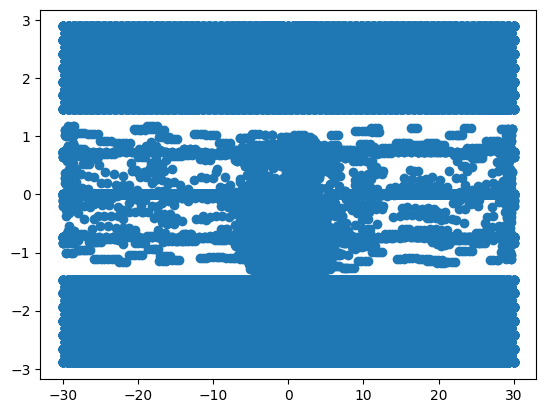

In [51]:
from matplotlib import pyplot as plt

plt.plot(nodes_force["x"], nodes_force["z"], "o")

In [52]:
inp_f.run("output",mkdirforce=True)

Running Calculix at:  output
Output file:  /home/djoroya/projects/CITISENS/CITISENS_Composite/scripts_finals/02_metodo/02_flexion/TPF5/output/out.txt
Command:
 wine /home/djoroya/projects/CITISENS/CITISENS_Composite/src/djccx/bin/ccx_dynamic.exe main > out.txt
Error reading cvf file

pid:  898550 

Calculix finished



{'data':           node         x          y        z        D1        D2        D3  \
 node                                                                         
 1            1  -3.25000  -3.255110 -2.83262 -0.124704  0.018737 -4.795210   
 2            2  -3.25000  -3.255110 -2.47638 -0.100558  0.018185 -4.797120   
 3            3  -2.53483  -4.398770 -2.47638 -0.084758  0.025344 -4.842550   
 4            4  -2.53483  -4.398770 -2.83262 -0.105712  0.026011 -4.841400   
 5            5  -3.25000  -4.474930 -2.47638 -0.091049  0.019371 -4.800180   
 ...        ...       ...        ...      ...       ...       ...       ...   
 507506  507506  18.94220 -11.433400  2.53238 -0.436633 -0.060194 -2.588670   
 507507  507507  28.83880   0.653362  2.77315 -0.541310 -0.026363 -0.355793   
 507508  507508  28.83820   4.687500  2.53577 -0.486901 -0.020106 -0.360969   
 507509  507509  28.78610  -3.109230  2.77337 -0.544956 -0.032719 -0.369699   
 507510  507510   1.09359  -6.720630  2.7736